#  Relationship between age, sex and a specific heart disease (ca)
## Name:Hessa ahmad


# Q1:First question: The table shows the number of cancer cases and healthy controls who smoke and do not smoke. 

In [1]:
options(warn=-1)
data1=read.csv("cancer.csv.csv")
head(data1)
attach(data1)
xtabs(~cancer+smoker, data=data1)
# 0="nonsmoker" , 1="smoker"
# 0="Healthy"  ,  1="cancer"

cancer,smoker
1,1
1,1
1,1
1,1
1,1
1,1


      smoker
cancer  0  1
     0  9  8
     1  2 12

## 1-Perform the necessary statistical analysis to choose the correct statement :
#### a) A person with cancer is 3 times more likely to be a smoker.
#### b) A smoker is 7 times more likely to get cancer compared to a non-smoker.
#### c) A smoker is 3 times more likely to get cancer compared to a non -smoker.
#### d) A person with cancer is 7 times more likely to be a smoker.


###### Chosse B) Asomker is 7 times more likley to get cancer compared to non-somker 

In [10]:
OR<-(12/8)/(2/9) # Manual

[1] 6.75

In [100]:
oddsratio(12,2,8,9)

           Disease Nondisease Total
Exposed         12          8    20
Nonexposed       2          9    11
Total           14         17    31



	Odds ratio estimate and its significance probability

data:  12 2 8 9
p-value = 0.02765
95 percent confidence interval:
  1.144904 39.795906
sample estimates:
[1] 6.75


In [ ]:
as we see 6.75 ia an estimate of the odds ratio between cancer and somker,
that mean a smoker is more likely to get cancer 6.75 so almost 7  comperd to a non-somker 
which is mean statement B is the correct statement.

## 2- At 0.05 level of significance, test for association between cancer status and smoking useing 2 different methods.

In [5]:
model_cancer <- glm(cancer~smoker,data=data1 ,family="binomial")
summary(model_cancer) #y:cancer #x1:smoker


Call:
glm(formula = cancer ~ smoker, family = "binomial", data = data1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3537  -0.9936  -0.6335   1.0108   1.8465  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -1.5041     0.7817  -1.924   0.0544 .
smoker        1.9095     0.9052   2.109   0.0349 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 42.684  on 30  degrees of freedom
Residual deviance: 37.352  on 29  degrees of freedom
AIC: 41.352

Number of Fisher Scoring iterations: 4



Log(odds)= -1.5041+1.9095x1    testing by use α=0.05
x1 this variable , the patient is smoker, is equal to 0 when the patient is non-smoker and 1 when the patient is smoker .thus if we predicting cancer for a non-smoker patient, we get the following equation:
cancer = -1.5041+1.9095*0
cancer =-1.5041
Thus, the log(odds) that a non-smoker has cancer= -1.5041 
if we predicting cancer for a smoker patient, we get the following equation:
cancer =  -1.5041+1.9095*1
cancer =  -1.5041+1.9095 
Since this fist term is the log(odds) of a non-smoker having cancer , the second term indicates the increase in the log(odds)by 1.9095  that a smoker has of geting cancer and p-value indicates that it is significant in cancer.

In [7]:
wald.test(model_cancer,term=2) #method1

$W
[1] 4.449786

$pvalue
[1] 0.03490561

attr(,"class")
[1] "wald.test"

H0:b1=0 Vs. H1: b1 not equal 0  testing by use α=0.05
by 4.449786 from wald test statistic we have p-value=0.03491 whish is less than 0.05 , that is mean there is a association between smoker and cancer.

In [11]:
anova(model_cancer,test="LRT") #method2

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,30,42.68435,NA
smoker,1,5.332816,29,37.35153,0.02092754


H0:b1=0 Vs. H1: b1 not equal 0  testing by use α=0.05
by 5.332816 from LRT test statistic with 1 degree o freedom , we have p-value=0.02093 
whish is less than 0.05 that is mean there is a association between smoker and cancer.

_______________________________________________________________________________________________________________________________

# Q2: The data below was collected from 87 individuals to study the relationship between age, sex and a specific heart disease (ca).

In [2]:
data=read.csv("heart2.csv")
head(data)
attach(data)
summary(data)

sex,ca,Age,ecg
female,0,28,low
male,1,42,low
female,0,46,medium
male,0,45,medium
female,0,34,low
male,1,44,low


     sex           ca              Age            ecg    
 female:33   Min.   :0.0000   Min.   :28.00   high  :13  
 male  :45   1st Qu.:0.0000   1st Qu.:41.25   low   :33  
             Median :1.0000   Median :46.50   medium:32  
             Mean   :0.5256   Mean   :46.90              
             3rd Qu.:1.0000   3rd Qu.:53.75              
             Max.   :1.0000   Max.   :63.00              

*The data collected from 87 individuals to study the relationship between age , sex and specific heart disease called (ca) .
y=ca
x1=sex
x2=Age


## 1-Which model you use and why?
Since we study the relationship between variables the response variable from them have a binary data type , the response variable is heart disease called (ca) have "yes/no" data it is  categorical so Since that we use logistic regression ,by scatterplot we can describing data also we can know which model we should to use and th logistic regression have "s" shape in the plot.

In [7]:
str(data)
data$ca <- as.factor(data$ca)
#to show data type , as we see need to change ca to factor
#in ca 0 = "no"  , 1 = "yes"

'data.frame':	78 obs. of  4 variables:
 $ sex: Factor w/ 2 levels "female","male": 1 2 1 2 1 2 1 2 1 2 ...
 $ ca : Factor w/ 2 levels "0","1": 1 2 1 1 1 2 2 2 1 1 ...
 $ Age: int  28 42 46 45 34 44 48 45 38 45 ...
 $ ecg: Factor w/ 3 levels "high","low","medium": 2 2 3 3 2 2 3 3 2 2 ...


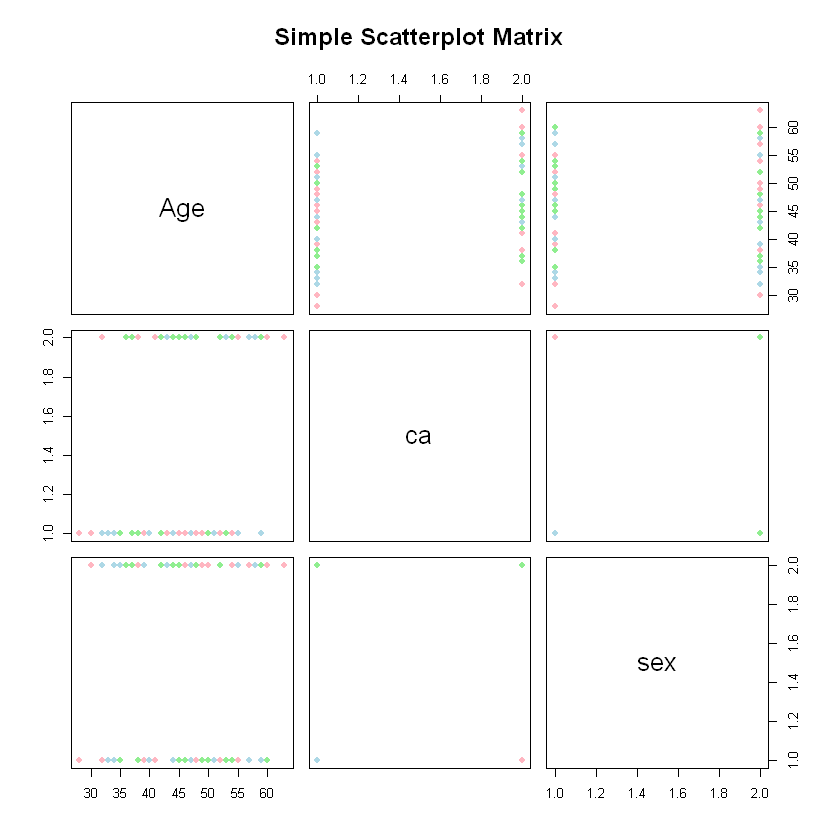

In [6]:
pairs(~Age+ca+sex,data=data,main="Simple Scatterplot Matrix",pch=16,col=c("light pink","light blue","light green"))

In [3]:
model_ca <- glm(ca~sex+Age , data=data ,family="binomial")
summary(model_ca)


Call:
glm(formula = ca ~ sex + Age, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8263  -1.0021   0.5216   1.0011   2.0901  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -5.05727    1.68088  -3.009  0.00262 **
sexmale      1.37281    0.52576   2.611  0.00903 **
Age          0.09351    0.03337   2.803  0.00507 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 107.926  on 77  degrees of freedom
Residual deviance:  92.501  on 75  degrees of freedom
AIC: 98.501

Number of Fisher Scoring iterations: 3


log(odds)=-5.05727  +  1.37281 x1 + 0.09351 x2 
testing by use α=0.05 
Each unit increase in Age increases the log odds of heart disease (ca) by 0.09351 and p-value indicates that it is significant in heart disease (ca) when we assume sex is constant . 
x1 this variable , the patient is male, is equal to 0 when the patient is female and 1 when the patient is male .thus if we predicting heart disease for a female patient, we get the following equation:
    heart disease = -5.05727  +  1.37281*0 + 0.09351 x2
   heart disease = -5.05727  + 0.09351 x2
Thus, the log(odds) that a female has heart disease = -5.05727  + 0.09351 x2
if we predicting heart disease for a male patient, we get the following equation:
heart disease = -5.05727  +  1.37281*1 + 0.09351 x2 
heart disease = -5.05727 + 0.09351 x2 +  1.37281 
Since this fist term is the log(odds) of a female having heart disease , the second term indicates the increase in the log(odds)by  1.37281  that a male has of having heart disease and p-value indicates that it is significant in heart disease (ca). 


## 2-Test the overall significance of your model.


H0: the model as a whole is no better than the null model
H1: the model as a whole is better than the null model

In [12]:
with(model_ca,null.deviance - deviance) #Test statistic

[1] 15.42496

The degrees of freedom for the difference between the models is equal to the number of predictor variables and can obtained using:

In [13]:
with(model_ca,df.null - df.residual) #degree od freedom

[1] 2

The p-value can be obtained using: 

In [14]:
with(model_ca,pchisq(null.deviance - deviance,df.null - df.residual, lower.tail= FALSE))

[1] 0.0004472102

The chi-square of 15.425 with 2 degrees of freedom and an associated p-value of less than 0.05 tell us that as a whole fits significantly  better than an empty model.

In [15]:
logLik(model_ca) # to see the model's log likelihood

'log Lik.' -46.25039 (df=3)

## 3-Is age significantly associated with the heart disease.

In [41]:
library(mdscore,lib.loc ="C:/Users/Hessa/OneDrive/R")
library(MASS,lib.loc="C:/Users/Hessa/OneDrive/R")
wald.test(model_ca,term=3)

$W
[1] 7.855042

$pvalue
[1] 0.005067918

attr(,"class")
[1] "wald.test"

H0:b2=0 Vs. H1: b2 not equal 0 (b2 since Age in x2 with my model)   testing by use α=0.05
by 7.855042 from wald test statistic we have p-value=0.00507 whish is less than 0.05 , that is mean there is a association between age and heart disease.

## 4- According to the data, who is more likely to have the disease, men or female?and interpret the result.
### Hint: Use odds ratios

In [60]:
xtabs(~ca+sex, data=data) #0="no" , 1="yes" 
#1="male"  , 0="female"

   sex
ca  female male
  0     21   16
  1     12   29

In [74]:
odds_ratio<-(29/16)/(12/21) # Manual
odds_ratio

[1] 3.171875

In [62]:
library(fmsb,lib.loc ="C:/Users/Hessa/OneDrive/R")

In [76]:
oddsratio(29,12,16,21)

           Disease Nondisease Total
Exposed         29         16    45
Nonexposed      12         21    33
Total           41         37    78



	Odds ratio estimate and its significance probability

data:  29 12 16 21
p-value = 0.01477
95 percent confidence interval:
 1.244316 8.085398
sample estimates:
[1] 3.171875


So 3.171875 is an estimate of the odds ratio between heart disease (ca) and sex , The men is more likely to have the disease 3.171875 almost 3 times comperd to female .

## 5-Perform LOOCV. What can you conclude?

In [3]:
library(lattice)
library(caret)
options(warn=-1)

In [9]:
model_ca <- glm(ca~sex+Age , data=data ,family="binomial")

loocv_model<-train(ca~ sex+Age , data=data , method="glm", trControl=trainControl(method= "loocv"))
loocv_model

Generalized Linear Model 

78 samples
 2 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 77, 77, 77, 77, 77, 77, ... 
Resampling results:

  RMSE       Rsquared  MAE      
  0.4238694  NaN       0.4238694


We use cross-validation to protect against overfitting in a predictive model. By refer to point 2 we see a whole fits significantly better than an empty model by p-value , so with LOOCV 0.42389 it is small numberso whish is tell us we do good estimation for the model.

## ROC

In [9]:
library(pROC,lib.loc ="C:/Users/Hessa/OneDrive/R")
library(randomForest,lib.loc ="C:/Users/Hessa/OneDrive/R")
options(warn=-1)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = ca, predictor = new_model$fitted.values,     plot = TRUE, legacy.axes = TRUE, col = "light pink", lwd = 4)

Data: new_model$fitted.values in 37 controls (ca 0) < 41 cases (ca 1).
Area under the curve: 0.7465

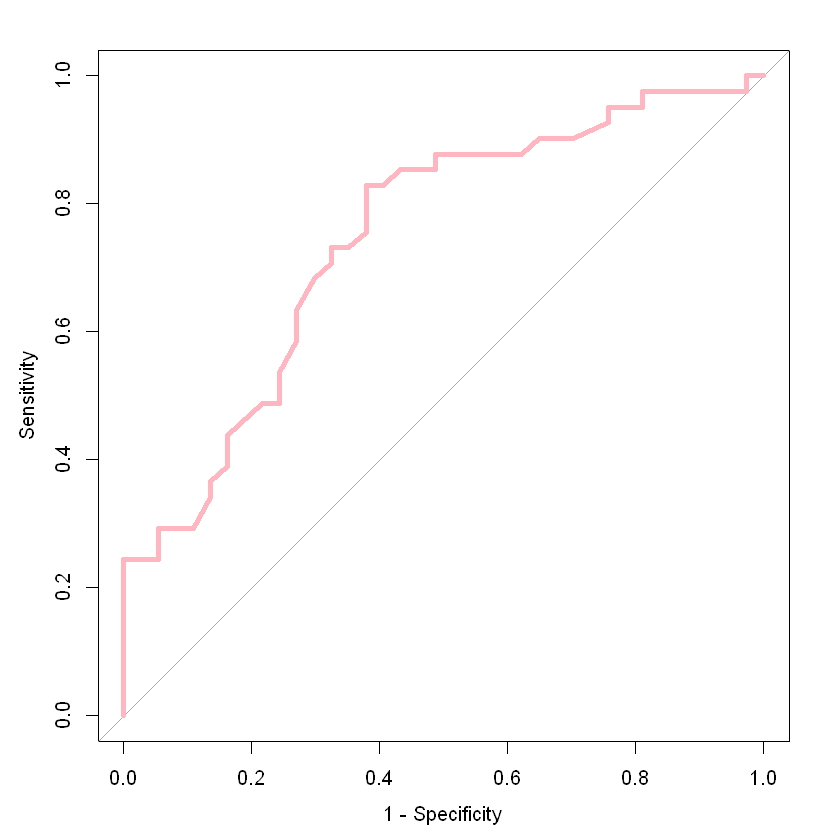

In [8]:
options(warn=-1)
new_model<-glm(ca~sex+Age ,family = "binomial")
roc(ca,new_model$fitted.values,plot=TRUE,legacy.axes=TRUE,col="light pink", lwd=4)

Area under the curveis =0.747 , since it is greater than 0.5 that mean the model acceptable so bigger the area the better classifier.